<a href="https://colab.research.google.com/github/farrasdny/AnalisisBigDataTugas2/blob/main/Tugas_2_Analisis_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT LIBRARY KEBUTUHAN**

1.   **import numpy as np**: salah satu pustaka (library) yang sangat berguna untuk manipulasi data numerik
2.   **import pandas as pd**: pustaka yang sering digunakan untuk manipulasi dan analisis data tabular (seperti data dalam bentuk tabel atau dataframe).
3.   **from sklearn.preprocessing import LabelEncoder**: salah satu alat yang digunakan untuk mengubah label kategori (kategorikal) menjadi nilai-nilai numerik.
4.   **from matplotlib.pyplot as plt**: ustaka yang digunakan untuk membuat visualisasi data, termasuk grafik dan plot dalam berbagai bentuk.
5.   **import seaborn as sns**: pustaka Python yang dibangun di atas Matplotlib dan digunakan untuk membuat visualisasi data yang lebih menarik dan informatif.
6.   **from sklearn.model_selection import train_test_split**: digunakan untuk membagi dataset menjadi dua subset: satu untuk pelatihan model (training set) dan satu lagi untuk menguji model (testing set) secara acak



In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Mengambil dataset dari google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **KORELASI STUDENT REGISTRATION & STUDENT INFO**
Korelasi dataset mengacu pada hubungan atau keterkaitan statistik antara dua atau lebih variabel dalam dataset. Ini membantu kita memahami sejauh mana perubahan dalam satu variabel dapat mempengaruhi perubahan dalam variabel lainnya. Korelasi sering digunakan dalam analisis data untuk mengidentifikasi hubungan antara variabel dan dapat membantu dalam pemahaman lebih lanjut tentang data, pengambilan keputusan, dan pengembangan model statistik atau machine learning.

Student Registration & Student Info memiliki suatu keterkaitan dalam skema database

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/kaggle_dataset/analisis_big_data'

In [4]:
# Define the data
d1 = pd.read_csv('/content/drive/MyDrive/kaggle_dataset/analisis_big_data/studentRegistration.csv')

d2 = pd.read_csv('/content/drive/MyDrive/kaggle_dataset/analisis_big_data/studentInfo.csv')

In [5]:
data1 = pd.DataFrame(d1)
data2 = pd.DataFrame(d2)

menggabungkan dua data yaitu data studentRegistration & studentInfo dengan fungsi merge berdasarkan atribut id_student

In [6]:
# Merge dataset berdasarkan kolom "id_student"
merged_dataset = pd.merge(data1, data2, on='id_student', how='inner')

mengecek duplikasi id_student dikarenakan id tidak akan sama satu dengan yang lainnya, ketika ada duplikasi id akan di hapus

In [7]:
# Cek duplikasi id_student
print("Jumlah duplikasi: ", merged_dataset.duplicated('id_student').sum())

Jumlah duplikasi:  12016


In [8]:
# Menghapus duplikasi, karna id_student tidak ada yang sama
merged_dataset = merged_dataset.drop_duplicates('id_student')

In [9]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28785 entries, 0 to 40800
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module_x         28785 non-null  object 
 1   code_presentation_x   28785 non-null  object 
 2   id_student            28785 non-null  int64  
 3   date_registration     28747 non-null  float64
 4   date_unregistration   8968 non-null   float64
 5   code_module_y         28785 non-null  object 
 6   code_presentation_y   28785 non-null  object 
 7   gender                28785 non-null  object 
 8   region                28785 non-null  object 
 9   highest_education     28785 non-null  object 
 10  imd_band              27814 non-null  object 
 11  age_band              28785 non-null  object 
 12  num_of_prev_attempts  28785 non-null  int64  
 13  studied_credits       28785 non-null  int64  
 14  disability            28785 non-null  object 
 15  final_result       

menampilkan hasil gabungan antar dua data

In [10]:
# Hasil integrasi
merged_dataset

,code_module_x,code_presentation_x,id_student,date_registration,date_unregistration,code_module_y,code_presentation_y,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,-159.0,NaN,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,-53.0,NaN,AAA,2013J,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,-92.0,12.0,AAA,2013J,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,-52.0,NaN,AAA,2013J,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,-176.0,NaN,AAA,2013J,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40796,GGG,2014J,2640965,-4.0,NaN,GGG,2014J,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
40797,GGG,2014J,2645731,-23.0,NaN,GGG,2014J,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
40798,GGG,2014J,2648187,-129.0,NaN,GGG,2014J,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
40799,GGG,2014J,2679821,-49.0,101.0,GGG,2014J,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


Mengecek apakah dalam data tersebut terdapat missing value (null value), ternyata terdapat 38 missing value dari atribut date_registration, 19817 missing value dari atribut date_unregistration, dan 971 missing value dari atribut imd_band

In [11]:
merged_dataset.isnull().sum()

code_module_x               0
code_presentation_x         0
id_student                  0
date_registration          38
date_unregistration     19817
code_module_y               0
code_presentation_y         0
gender                      0
region                      0
highest_education           0
imd_band                  971
age_band                    0
num_of_prev_attempts        0
studied_credits             0
disability                  0
final_result                0
dtype: int64

Mengecek duplikasi pada data, ternyata tidak terdapat nilai yang terduplikasi

In [12]:
print("Jumlah duplikasi: ", merged_dataset.duplicated().sum())

Jumlah duplikasi:  0


Menghapus missing value yang terdapat pada data tersebut, dan akhirnya missing value sudah tidak ada

In [13]:
merged_dataset = merged_dataset.dropna(how='any')

In [14]:
merged_dataset.isnull().sum()

code_module_x           0
code_presentation_x     0
id_student              0
date_registration       0
date_unregistration     0
code_module_y           0
code_presentation_y     0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
dtype: int64

In [15]:
d = pd.DataFrame(merged_dataset)

Selanjutnya lakukan encoding terhadap tipe data atribut yang bertipe objek agar mudah saat dilakukan visualisasi

In [16]:
le = LabelEncoder()
for column in d.columns:
    if d[column].dtype == 'object':
        d[column] = le.fit_transform(d[column])
d.dtypes

code_module_x             int64
code_presentation_x       int64
id_student                int64
date_registration       float64
date_unregistration     float64
code_module_y             int64
code_presentation_y       int64
gender                    int64
region                    int64
highest_education         int64
imd_band                  int64
age_band                  int64
num_of_prev_attempts      int64
studied_credits           int64
disability                int64
final_result              int64
dtype: object

Pada visualisasi, saya melakukan pengukuran chart terhadap atribut disability, ternyata murid dengan pengidap disabilitas hanya sedikit dari total murid

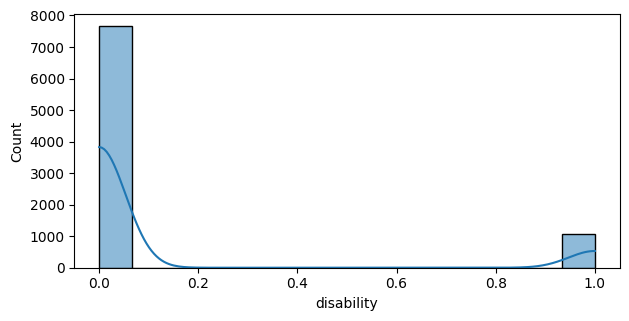

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data=d, x="disability", kde=True)
plt.tight_layout()
plt.show()

# **KORELASI STUDENT ASSESSMENTS & ASSESSMENTS**

Student Assessments memiliki hubungan kepada data Assessments

In [18]:
# Define the data
d3 = pd.read_csv('/content/drive/MyDrive/kaggle_dataset/analisis_big_data/studentAssessment.csv')

d4 = pd.read_csv('/content/drive/MyDrive/kaggle_dataset/analisis_big_data/assessments.csv')

In [19]:
data3 = pd.DataFrame(d3)
data4 = pd.DataFrame(d4)

In [20]:
data3

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [21]:
data4

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


Melakukan kolerasi data terhadap atribut id_assessment

In [22]:
# Merge dataset berdasarkan kolom "id_assessment"
merged_dataset_2 = pd.merge(data3, data4, on='id_assessment', how='inner')

Terdapat 173724 jumlah duplikasi pada value id_assessment setelah di korelasi

In [23]:
# Cek duplikasi id_student
print("Jumlah duplikasi: ", merged_dataset_2.duplicated('id_assessment').sum())

Jumlah duplikasi:  173724


Menghapus duplikasi id_assessment karena id_assessment tidak ada yang sama (bersifat unique)

In [24]:
# Menghapus duplikasi
merged_dataset_2 = merged_dataset_2.drop_duplicates('id_assessment')

In [25]:
# Hasil integrasi
merged_dataset_2

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
359,1753,704156,56,0,68.0,AAA,2013J,TMA,54.0,20.0
701,1754,564450,114,0,64.0,AAA,2013J,TMA,117.0,20.0
1032,1755,11391,164,0,85.0,AAA,2013J,TMA,166.0,20.0
1335,1756,704156,215,0,70.0,AAA,2013J,TMA,215.0,30.0
...,...,...,...,...,...,...,...,...,...,...
171696,37439,31205,129,0,100.0,GGG,2014J,CMA,229.0,0.0
172200,37440,653435,173,0,100.0,GGG,2014J,CMA,229.0,0.0
172679,37441,561419,228,0,60.0,GGG,2014J,CMA,229.0,0.0
173152,37442,60162,220,0,60.0,GGG,2014J,CMA,229.0,0.0


Mengecek missing value, terdapat 3 missing value pada atribut date

In [26]:
merged_dataset_2.isnull().sum()

id_assessment        0
id_student           0
date_submitted       0
is_banked            0
score                0
code_module          0
code_presentation    0
assessment_type      0
date                 3
weight               0
dtype: int64

Mengecek duplikasi pada data keseluruhan, dan tidak terdapat duplikasi data

In [27]:
print("Jumlah duplikasi: ", merged_dataset_2.duplicated().sum())

Jumlah duplikasi:  0


Menghapus missing value pada atribut date

In [28]:
merged_dataset_2 = merged_dataset_2.dropna(how='any')

In [29]:
merged_dataset_2.isnull().sum()

id_assessment        0
id_student           0
date_submitted       0
is_banked            0
score                0
code_module          0
code_presentation    0
assessment_type      0
date                 0
weight               0
dtype: int64

Membuat variabel baru untuk menampung dataframe dari korelasi data

DataFrame adalah tabel dua dimensi yang terdiri dari baris dan kolom, mirip dengan spreadsheet atau tabel dalam database. Ini menyediakan cara yang efisien untuk mengelola, menganalisis, dan memanipulasi data dalam format tabular.



In [30]:
d_2 = pd.DataFrame(merged_dataset_2)

Lakukan encoding data yang bertipe objek agar memudahkan dalam proses visualisasi

In [31]:
le = LabelEncoder()
for column in d_2.columns:
    if d_2[column].dtype == 'object':
        d_2[column] = le.fit_transform(d_2[column])
d_2.dtypes

id_assessment          int64
id_student             int64
date_submitted         int64
is_banked              int64
score                float64
code_module            int64
code_presentation      int64
assessment_type        int64
date                 float64
weight               float64
dtype: object

Visualisasi data pada atribut is_banked dari data yang sudah dikorelasi, Atribut "is_banked" dalam dataset yang sudah dikorelasi kemungkinan adalah atribut yang mengindikasikan apakah jawaban atau tugas siswa dalam penilaian atau ujian telah diaudit atau diverifikasi oleh bank soal atau sistem yang lebih tinggi. Ini biasanya berhubungan dengan masalah kejujuran akademik dan mungkin digunakan untuk melacak apakah siswa mengakses jawaban atau materi yang tidak seharusnya selama ujian atau penilaian.

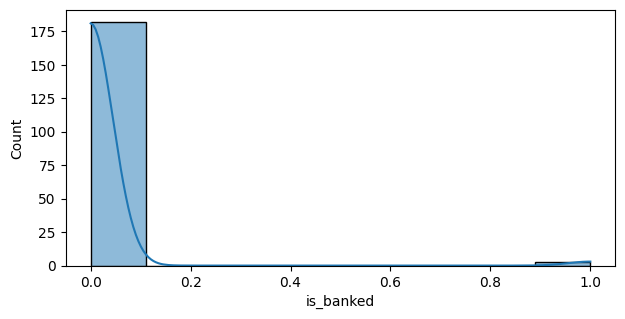

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data=d_2, x="is_banked", kde=True)
plt.tight_layout()
plt.show()

# **KORELASI COURSES & VLE**

Data courses berhubungan pada data vle, maka dari itu kita lakukan korelasi dari dua data tersebut

In [33]:
# Define the data
d5 = pd.read_csv('/content/drive/MyDrive/kaggle_dataset/analisis_big_data/courses.csv')

d6 = pd.read_csv('/content/drive/MyDrive/kaggle_dataset/analisis_big_data/vle.csv')

In [34]:
data5 = pd.DataFrame(d5)
data6 = pd.DataFrame(d6)

In [35]:
d5

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


In [36]:
d6

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


Lakukan merge kedua data berdasarkan atribut code_module

In [37]:
# Merge dataset berdasarkan kolom "code_module"
merged_dataset_3 = pd.merge(data5, data6, on='code_module', how='inner')

Mengecek tipe data dari masing-masing atribut

In [38]:
merged_dataset_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23089 entries, 0 to 23088
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 23089 non-null  object 
 1   code_presentation_x         23089 non-null  object 
 2   module_presentation_length  23089 non-null  int64  
 3   id_site                     23089 non-null  int64  
 4   code_presentation_y         23089 non-null  object 
 5   activity_type               23089 non-null  object 
 6   week_from                   4361 non-null   float64
 7   week_to                     4361 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.6+ MB


In [39]:
# Hasil integrasi
merged_dataset_3

,code_module,code_presentation_x,module_presentation_length,id_site,code_presentation_y,activity_type,week_from,week_to
0,AAA,2013J,268,546943,2013J,resource,NaN,NaN
1,AAA,2013J,268,546712,2013J,oucontent,NaN,NaN
2,AAA,2013J,268,546998,2013J,resource,NaN,NaN
3,AAA,2013J,268,546888,2013J,url,NaN,NaN
4,AAA,2013J,268,547035,2013J,resource,NaN,NaN
...,...,...,...,...,...,...,...,...
23084,GGG,2014B,241,897063,2014J,resource,NaN,NaN
23085,GGG,2014B,241,897109,2014J,resource,NaN,NaN
23086,GGG,2014B,241,896965,2014J,oucontent,NaN,NaN
23087,GGG,2014B,241,897060,2014J,resource,NaN,NaN


Mengecek missing value dari data korelasi dan terdaapt 18728 missing value pada atribut week_from, dan terdapat 18728 missing value pada atribut week_to, itu sebabnya isi data tersebut NaN

In [40]:
merged_dataset_3.isnull().sum()

code_module                       0
code_presentation_x               0
module_presentation_length        0
id_site                           0
code_presentation_y               0
activity_type                     0
week_from                     18728
week_to                       18728
dtype: int64

In [41]:
print("Jumlah duplikasi: ", merged_dataset_3.duplicated().sum())

Jumlah duplikasi:  0


Menghapus semua missing value pada atribut week_from dan week_to

In [42]:
merged_dataset_3 = merged_dataset_3.dropna(how='any')

In [43]:
merged_dataset_3.isnull().sum()

code_module                   0
code_presentation_x           0
module_presentation_length    0
id_site                       0
code_presentation_y           0
activity_type                 0
week_from                     0
week_to                       0
dtype: int64

In [44]:
d_3 = pd.DataFrame(merged_dataset_3)

Melakukan encoding terhadap tipe data object menjadi numerik agar memudahkan dalam proses visualisasi

In [45]:
le = LabelEncoder()
for column in d_3.columns:
    if d_3[column].dtype == 'object':
        d_3[column] = le.fit_transform(d_3[column])
d_3.dtypes

code_module                     int64
code_presentation_x             int64
module_presentation_length      int64
id_site                         int64
code_presentation_y             int64
activity_type                   int64
week_from                     float64
week_to                       float64
dtype: object

In [46]:
d_3

,code_module,code_presentation_x,module_presentation_length,id_site,code_presentation_y,activity_type,week_from,week_to
113,0,1,268,546732,1,2,2.0,2.0
198,0,1,268,546719,1,2,1.0,1.0
210,0,1,268,546681,1,2,1.0,1.0
264,0,1,268,877040,3,2,2.0,2.0
323,0,1,268,877045,3,2,1.0,1.0
...,...,...,...,...,...,...,...,...
22968,6,2,241,798728,2,8,1.0,1.0
22991,6,2,241,897051,3,8,2.0,2.0
23010,6,2,241,897121,3,8,1.0,1.0
23029,6,2,241,897050,3,8,1.0,1.0


Visualisasi data terhadap atribut module_presentation_length, Atribut "module_presentation_length" mengacu pada panjang atau durasi modul presentasi atau kursus. Biasanya, atribut ini berisi informasi tentang berapa lama modul atau kursus akan berlangsung dalam satuan waktu tertentu

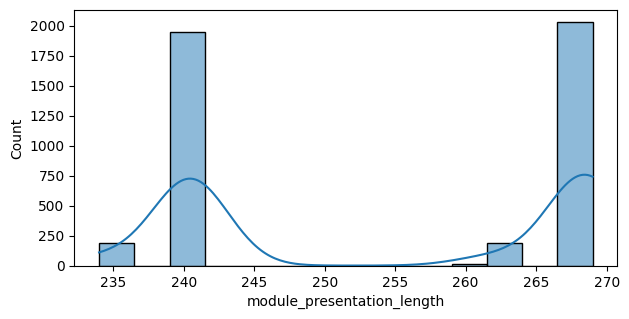

In [47]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data=d_3, x="module_presentation_length", kde=True)
plt.tight_layout()
plt.show()

# **KORELASI STUDENT VLE & VLE**

Data studentVle memiliki hubungan terhadap data Vle, maka dilakukan korelasi dari kedua data tersebut

In [48]:
# Define the data
d7 = pd.read_csv('/content/drive/MyDrive/kaggle_dataset/analisis_big_data/studentVle.csv')

In [49]:
data7 = pd.DataFrame(d7)

In [50]:
data7

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [51]:
data6

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


Menggabungkan kedua data tersebut berdasarkan atribut id_site

In [52]:
# Merge dataset berdasarkan kolom "id_site"
merged_dataset_4 = pd.merge(data7, data6, on='id_site', how='inner')

In [53]:
merged_dataset_4

,code_module_x,code_presentation_x,id_student,id_site,date,sum_click,code_module_y,code_presentation_y,activity_type,week_from,week_to
0,AAA,2013J,28400,546652,-10,4,AAA,2013J,forumng,NaN,NaN
1,AAA,2013J,28400,546652,-10,1,AAA,2013J,forumng,NaN,NaN
2,AAA,2013J,28400,546652,-10,1,AAA,2013J,forumng,NaN,NaN
3,AAA,2013J,28400,546652,-10,8,AAA,2013J,forumng,NaN,NaN
4,AAA,2013J,30268,546652,-10,3,AAA,2013J,forumng,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10655275,GGG,2014J,647054,896969,227,8,GGG,2014J,oucontent,NaN,NaN
10655276,GGG,2014J,499187,896969,228,8,GGG,2014J,oucontent,NaN,NaN
10655277,GGG,2014J,629258,896969,228,23,GGG,2014J,oucontent,NaN,NaN
10655278,GGG,2014J,534672,896969,228,1,GGG,2014J,oucontent,NaN,NaN


Mengecek missing value dari hasil korelasi kedua data, terdapat 9269544 missing value pada atribut week_from, dan terdapat 9269544 missing value pada atribut week_to, ini sangat beresiko sekali ketika tidak dihilangkan

In [54]:
merged_dataset_4.isnull().sum()

code_module_x                0
code_presentation_x          0
id_student                   0
id_site                      0
date                         0
sum_click                    0
code_module_y                0
code_presentation_y          0
activity_type                0
week_from              9269544
week_to                9269544
dtype: int64

In [55]:
print("Jumlah duplikasi: ", merged_dataset_4.duplicated().sum())

Jumlah duplikasi:  787170


In [56]:
merged_dataset_4 = merged_dataset_4.dropna(how='any')

In [57]:
merged_dataset_4.isnull().sum()

code_module_x          0
code_presentation_x    0
id_student             0
id_site                0
date                   0
sum_click              0
code_module_y          0
code_presentation_y    0
activity_type          0
week_from              0
week_to                0
dtype: int64

In [58]:
merged_dataset_4

,code_module_x,code_presentation_x,id_student,id_site,date,sum_click,code_module_y,code_presentation_y,activity_type,week_from,week_to
64022,AAA,2013J,32885,546681,-10,5,AAA,2013J,oucontent,1.0,1.0
64023,AAA,2013J,38053,546681,-10,2,AAA,2013J,oucontent,1.0,1.0
64024,AAA,2013J,58873,546681,-10,10,AAA,2013J,oucontent,1.0,1.0
64025,AAA,2013J,59185,546681,-10,3,AAA,2013J,oucontent,1.0,1.0
64026,AAA,2013J,62155,546681,-10,4,AAA,2013J,oucontent,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
10560448,GGG,2014J,691229,897052,222,1,GGG,2014J,resource,3.0,3.0
10560449,GGG,2014J,1777563,897052,223,1,GGG,2014J,resource,3.0,3.0
10560450,GGG,2014J,625530,897052,223,1,GGG,2014J,resource,3.0,3.0
10560451,GGG,2014J,682625,897052,226,1,GGG,2014J,resource,3.0,3.0


In [59]:
d_4 = pd.DataFrame(merged_dataset_4)

Encoding tipe data object dari value korelasi data menjadi numerik agar memudahkan dalam proses visualisasi data

In [60]:
le = LabelEncoder()
for column in d_4.columns:
    if d_4[column].dtype == 'object':
        d_4[column] = le.fit_transform(d_4[column])
d_4.dtypes

code_module_x            int64
code_presentation_x      int64
id_student               int64
id_site                  int64
date                     int64
sum_click                int64
code_module_y            int64
code_presentation_y      int64
activity_type            int64
week_from              float64
week_to                float64
dtype: object

Visualisasi data terhadap atribut date pada korelasi ini

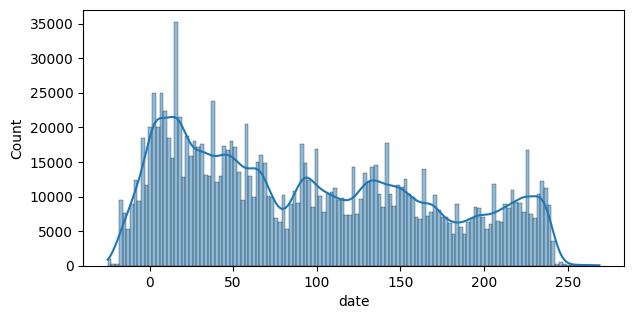

In [61]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data=d_4, x="date", kde=True)
plt.tight_layout()
plt.show()